https://realpython.com/nltk-nlp-python/

<h1><center>Institut des Algorithmes du Sénégal</center></h1>

<h1><center>Introduction to NLP</center></h1>

Table of Contents

- Getting Started With Python’s NLTK
- Tokenizing
- Filtering Stop Words
- Stemming
- Tagging Parts of Speech
- Lemmatizing
- Chunking
- Chinking
- Using Named Entity Recognition (NER)
- Getting Text to Analyze
- Using a Concordance
- Making a Dispersion Plot
- Making a Frequency Distribution
- Finding Collocations
- Conclusion

[Natural language processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing) is a field that focuses on making natural human language usable by computer programs. NLTK, or [Natural Language Toolkit](https://www.nltk.org/), is a Python package that you can use for NLP.

A lot of the data that you could be analyzing is unstructured data and contains human-readable text. Before you can analyze that data programmatically, you first need to preprocess it. In this tutorial, you’ll take your first look at the kinds of text preprocessing tasks you can do with NLTK so that you’ll be ready to apply them in future projects. You’ll also see how to do some basic text analysis and create visualizations.

If you’re familiar with the basics of using Python and would like to get your feet wet with some NLP, then you’ve come to the right place.

By the end of this tutorial, you’ll know how to:

    - Find text to analyze
    - Preprocess your text for analysis
    - Analyze your text
    - Create visualizations based on your analysis

## Getting Started With Python’s NLTK

The first thing you need to do is make sure that you have Python installed. For this tutorial, you’ll be using Python 3.9. If you don’t yet have Python installed, then check out [Python 3 Installation & Setup Guide](https://realpython.com/installing-python/) to get started.

Once you have that dealt with, your next step is to install [NLTK](https://www.nltk.org/install.html) with [pip](https://realpython.com/what-is-pip/). It’s a best practice to install it in a virtual environment. To learn more about virtual environments, check out Python Virtual Environments: A Primer.

In [1]:
!pip install nltk

In order to create visualizations for [named entity recognition](https://realpython.com/nltk-nlp-python/#using-named-entity-recognition-ner), you’ll also need to install [NumPy](https://realpython.com/numpy-tutorial/) and [Matplotlib](https://realpython.com/python-matplotlib-guide/):

In [2]:
!pip install numpy matplotlib

## Tokenizing

By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

When you’re analyzing text, you’ll be tokenizing by word and tokenizing by sentence. Here’s what both types of tokenization bring to the table:

 - Tokenizing by word: Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. For example, if you were analyzing a group of job ads, then you might find that the word “Python” comes up often. That could suggest high demand for Python knowledge, but you’d need to look deeper to know more.
 - Tokenizing by sentence: When you tokenize by sentence, you can analyze how those words relate to one another and see more context. Are there a lot of negative words around the word “Python” because the hiring manager doesn’t like Python? Are there more terms from the domain of herpetology than the domain of software development, suggesting that you may be dealing with an entirely different kind of python than you were expecting?

In [3]:
## Here’s how to import the relevant parts of NLTK so you can tokenize by word and by sentence:
from nltk.tokenize import sent_tokenize, word_tokenize

Now that you’ve imported what you need, you can create a [string](https://realpython.com/python-strings/) to tokenize. Here’s a quote from [Dune](/en.wikipedia.org/wiki/Dune_(novel)) that you can use:

In [4]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

You can use sent_tokenize() to split up example_string into sentences:

In [5]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

Tokenizing example_string by sentence gives you a list of three strings that are sentences:

    1. "Muad'Dib learned rapidly because his first training was in how to learn."
    2. 'And the first lesson of all was the basic trust that he could learn.'
    3. "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."


Now try tokenizing example_string by word:

In [6]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

You got a list of strings that NLTK considers to be words, such as:

    - "Muad'Dib"
    - 'training'
    - 'how'
    
    
But the following strings were also considered to be words:

   -  "'s"
   - ','
   -  '.'

See how "It's" was split at the apostrophe to give you 'It' and "'s", but "Muad'Dib" was left whole? This happened because NLTK knows that 'It' and "'s" (a contraction of “is”) are two distinct words, so it counted them separately. But "Muad'Dib" isn’t an accepted contraction like "It's", so it wasn’t read as two separate words and was left intact.

## Filtering Stop Words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

Here’s how to import the relevant parts of NLTK in order to filter out stop words:

In [8]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Here’s a quote from Worf that you can filter:

In [9]:
worf_quote = "Sir, I protest. I am not a merry man!"

Now tokenize worf_quote by word and store the resulting list in words_in_quote:

In [10]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

You have a list of the words in worf_quote, so the next step is to create a set of stop words to filter words_in_quote. For this example, you’ll need to focus on stop words in "english":

In [11]:
stop_words = set(stopwords.words("english"))

Next, create an empty list to hold the words that make it past the filter:

In [12]:
filtered_list = []

You created an empty list, filtered_list, to hold all the words in words_in_quote that aren’t stop words. Now you can use stop_words to filter words_in_quote:

In [13]:
for word in words_in_quote:
   if word.casefold() not in stop_words:
        filtered_list.append(word)

You iterated over words_in_quote with a for loop and added all the words that weren’t stop words to filtered_list. You used .casefold() on word so you could ignore whether the letters in word were uppercase or lowercase. This is worth doing because stopwords.words('english') includes only lowercase versions of stop words.

Alternatively, you could use a list comprehension to make a list of all the words in your text that aren’t stop words:

In [14]:
filtered_list = [
    word for word in words_in_quote if word.casefold() not in stop_words
]

When you use a list comprehension, you don’t create an empty list and then add items to the end of it. Instead, you define the list and its contents at the same time. Using a list comprehension is often seen as more Pythonic.

Take a look at the words that ended up in filtered_list:

You filtered out a few words like 'am' and 'a', but you also filtered out 'not', which does affect the overall meaning of the sentence. (Worf won’t be happy about this.)

Words like 'I' and 'not' may seem too important to filter out, and depending on what kind of analysis you want to do, they can be. Here’s why:

    - 'I' is a pronoun, which are context words rather than content words:

        - Content words give you information about the topics covered in the text or the sentiment that the author has about those topics.

        - Context words give you information about writing style. You can observe patterns in how authors use context words in order to quantify their writing style. Once you’ve quantified their writing style, you can analyze a text written by an unknown author to see how closely it follows a particular writing style so you can try to identify who the author is.

    - 'not' is technically an adverb but has still been included in NLTK’s list of stop words for English. If you want to edit the list of stop words to exclude 'not' or make other changes, then you can download it.
    
    
So, 'I' and 'not' can be important parts of a sentence, but it depends on what you’re trying to learn from that sentence.

## Stemming

Stemming is a text processing task in which you reduce words to their [root](https://simple.wikipedia.org/wiki/Root_(linguistics)), which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has [more than one stemmer](http://www.nltk.org/howto/stem.html), but you’ll be using the [Porter stemmer](https://www.nltk.org/_modules/nltk/stem/porter.html).

Here’s how to import the relevant parts of NLTK in order to start stemming:

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

Now that you’re done importing, you can create a stemmer with PorterStemmer():

In [16]:
stemmer = PorterStemmer()

In [17]:
string_for_stemming = """
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

Before you can stem the words in that string, you need to separate all the words in it:

In [18]:
words = word_tokenize(string_for_stemming)

Now that you have a list of all the tokenized words from the string, take a look at what’s in words:

Create a list of the stemmed versions of the words in words by using stemmer.stem() in a list comprehension:

In [19]:
stemmed_words = [stemmer.stem(word) for word in words]

Take a look at what’s in stemmed_words:

In [20]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Here’s what happened to all the words that started with 'discov' or 'Discov':

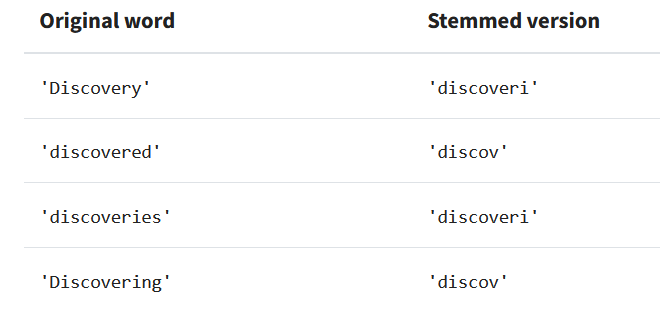

Now that you know what the POS tags mean, you can see that your tagging was fairly successful:

   - 'pie' was tagged NN because it’s a singular noun.
   - 'you' was tagged PRP because it’s a personal pronoun.
   - 'invent' was tagged VB because it’s the base form of a verb.


But how would NLTK handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

Make a string to hold an excerpt from this poem:

In [21]:
jabberwocky_excerpt = """
'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""

Use word_tokenize to separate the words in the excerpt and store them in a list:

In [22]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

Call nltk.pos_tag() on your new list of words:

In [25]:
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Accepted English words like 'and' and 'the' were correctly tagged as a conjunction and a determiner, respectively. The gibberish word 'slithy' was tagged as an adjective, which is what a human English speaker would probably assume from the context of the poem as well. Way to go, NLTK!

## Lemmatizing

Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.




Note: A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.

For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.

In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.

Here’s how to import the relevant parts of NLTK in order to start lemmatizing:

In [26]:
from nltk.stem import WordNetLemmatizer

Create a lemmatizer to use:

In [27]:
lemmatizer = WordNetLemmatizer()

Let’s start with lemmatizing a plural noun:

In [29]:
import nltk
nltk.download('omw-1.4')
lemmatizer.lemmatize("scarves")

[nltk_data] Downloading package omw-1.4 to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


'scarf'

"scarves" gave you 'scarf', so that’s already a bit more sophisticated than what you would have gotten with the Porter stemmer, which is 'scarv'. Next, create a string with more than one word to lemmatize:

In [30]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

Now tokenize that string by word:

In [31]:
words = word_tokenize(string_for_lemmatizing)

Here’s your list of words:

In [32]:
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

Create a list containing all the words in words after they’ve been lemmatized:

In [33]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

Here’s the list you got:

In [34]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

That looks right. The plurals 'friends' and 'scarves' became the singulars 'friend' and 'scarf'.

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [35]:
lemmatizer.lemmatize("worst")

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [36]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

The default parameter for pos is 'n' for noun, but you made sure that "worst" was treated as an adjective by adding the parameter pos="a". As a result, you got 'bad', which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because "worst" is the superlative form of the adjective 'bad', and lemmatizing reduces superlatives as well as comparatives to their lemmas.

Now that you know how to use NLTK to tag parts of speech, you can try tagging your words before lemmatizing them to avoid mixing up homographs, or words that are spelled the same but have different meanings and can be different parts of speech.

## Chunking

While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.



Note: A phrase is a word or group of words that works as a single unit to perform a grammatical function. Noun phrases are built around a noun.

Here are some examples:

   - “A planet”
   - “A tilting planet”
   -“A swiftly tilting planet”

Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

Here’s how to import the relevant parts of NLTK in order to chunk:

In [37]:
from nltk.tokenize import word_tokenize

Before you can chunk, you need to make sure that the parts of speech in your text are tagged, so create a string for POS tagging. You can use this quote from The [Lord of the Rings](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings):

In [38]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

Now tokenize that string by word:

In [39]:
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

Now you’ve got a list of all of the words in lotr_quote.

The next step is to tag those words by part of speech:

In [40]:
nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /opt/app-root/src/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

You’ve got a list of tuples of all the words in the quote, along with their POS tag. In order to chunk, you first need to define a chunk grammar.



Note: A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

For this tutorial, you don’t need to know how regular expressions work, but they will definitely come in handy for you in the future if you want to process text.


Create a chunk grammar with one regular expression rule:

In [41]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

NP stands for noun phrase. You can learn more about noun phrase chunking in Chapter 7 of Natural Language Processing with Python—Analyzing Text with the Natural Language Toolkit.

According to the rule you created, your chunks:

   1. Start with an optional (?) determiner ('DT')
   2. Can have any number (*) of adjectives (JJ)
   3. End with a noun (<NN>)

Create a chunk parser with this grammar:

In [42]:
chunk_parser = nltk.RegexpParser(grammar)

Now try it out with your quote:

In [43]:
tree = chunk_parser.parse(lotr_pos_tags)

Here’s how you can see a visual representation of this tree:

In [44]:
tree.draw()

/opt/app-root/lib64/python3.8/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


ModuleNotFoundError: No module named 'tkinter'

In [46]:
tree.draw()

ModuleNotFoundError: No module named 'tkinter'

In [50]:
!pip install install python3-tk

ERROR: Could not find a version that satisfies the requirement python3-tk (from versions: none)
ERROR: No matching distribution found for python3-tk
